# Exercise 2 – Canada Income Prediction
- Predicts income from year using linear regression.  
- Red line = regression line (predicted values).  
- Linear model fits continuous trend over time.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sn


In [4]:
# Load dataset
df = pd.read_csv("/Users/jacobfrancis/dev/csc180/csv/canada_per_capita_income.csv")
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [5]:
# Create and train linear regression model
model = linear_model.LinearRegression()
X=df[['year']]
y=df['income']
model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


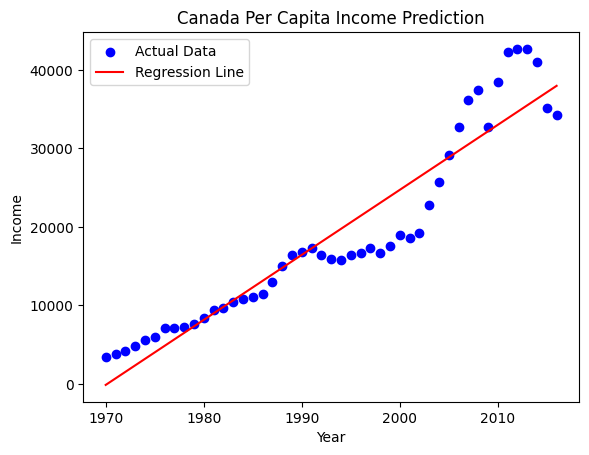

In [6]:
# Plot actual data and regression line
plt.scatter(df.year, df.income, color="blue", label="Actual Data")
plt.plot(df.year, model.predict(df[['year']]), color="red", label="Regression Line")
plt.xlabel("Year")
plt.ylabel("Income")
plt.legend()
plt.title("Canada Per Capita Income Prediction")
plt.show()

In [13]:
# Predict income for given years with boundary (no negatives)
pred_2030 = max(model.predict([[2030]])[0], 0)
pred_1965 = max(model.predict([[1965]])[0], 0)

print("Prediction for 2030:", pred_2030)
print("Prediction for 1965:", pred_1965)
print("Model Score:", model.score(X, y))

Prediction for 2030: 49573.34484664467
Prediction for 1965: 0
Model Score: 0.890916917957032


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create and train linear regression model
model2 = linear_model.LinearRegression()
model2.fit(X_train, y_train)
print("Model Score:", model2.score(X_test, y_test))

Model Score: 0.8751771396846304


In [10]:
model3 = DecisionTreeRegressor()
model3.fit(X_train, y_train)
print("Model Score:", model3.score(X_test, y_test))

Model Score: 0.968915600948717


In [11]:
model4 = RandomForestRegressor()
model4.fit(X_train, y_train)
print("Model Score:", model4.score(X_test, y_test))

Model Score: 0.9689332875850575



Confusion Matrix:
 [[3 4]
 [0 3]]


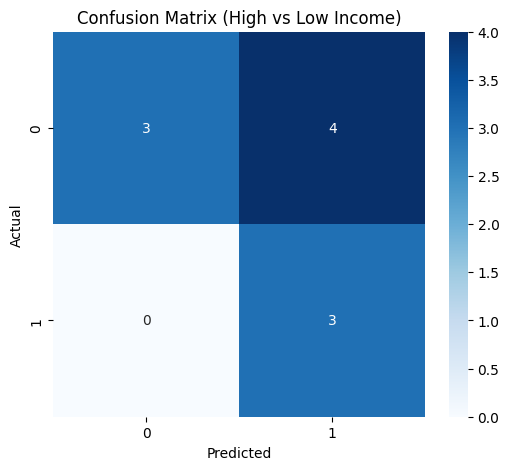

In [22]:
# For regression, predictions are continuous vaules
# So, we create a classification by labeling values
# 0 = Below average income, 1 = Above average income
y_pred = model2.predict(X_test)
y_pred = np.maximum(y_pred, 0)  # Apply 0 boundary

threshold = y.mean() # Mean income as classification threshold
y_true_class = (y_test > threshold).astype(int) # change value into int
y_pred_class = (y_pred > threshold).astype(int) # change value into int

# Generate confusion matrix
cm = confusion_matrix(y_true_class, y_pred_class)
print("\nConfusion Matrix:\n", cm)

# Visualize confusion matrix
plt.figure(figsize=(6,5))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (High vs Low Income)')
plt.show()

# Regression models output continuous values like income, not classes.
# To visualize a confusion matrix, we artificially convert predictions into
# two classes (above or below the mean).

In [ ]:
# Correctly predicted low income as low 3 times.
# Predicted high income 4 times when it was actually low
# Never predicted low when it was actually high.
# Correclty predicted high income 3 times.